<a href="https://colab.research.google.com/github/Malcolm777/Trading_algorithms/blob/master/AAPL_MACD_8_26_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#This program uses the Moving Average Crossover Divergence (MACD) to predict stock price 

In [3]:
#Import the libraries 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
plt.style.use('fivethirtyeight')

In [5]:
#Import the data
from google.colab import files 
uploaded = files.upload()

Saving AAPL_8.26.csv to AAPL_8.26.csv


In [7]:
#Get the data 
df = pd.read_csv('AAPL_8.26.csv')

#Show the index as the date 
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

#Show the data
df 

,Date,Open,High,Low,Close,Adj Close,Volume
2019-08-27,2019-08-27,207.860001,208.550003,203.529999,204.160004,202.154251,25873300
2019-08-28,2019-08-28,204.100006,205.720001,203.320007,205.529999,203.510803,15938800
2019-08-29,2019-08-29,208.500000,209.320007,206.660004,209.009995,206.956604,20990500
2019-08-30,2019-08-30,210.160004,210.449997,207.199997,208.740005,206.689255,21143400
2019-09-03,2019-09-03,206.429993,206.979996,204.220001,205.699997,203.679108,20023000
...,...,...,...,...,...,...,...
2020-08-20,2020-08-20,463.000000,473.570007,462.929993,473.100006,473.100006,31726800
2020-08-21,2020-08-21,477.049988,499.470001,477.000000,497.480011,497.480011,84513700
2020-08-24,2020-08-24,514.789978,515.140015,495.750000,503.429993,503.429993,86484400
2020-08-25,2020-08-25,498.790009,500.720001,492.209991,499.299988,499.299988,52873900


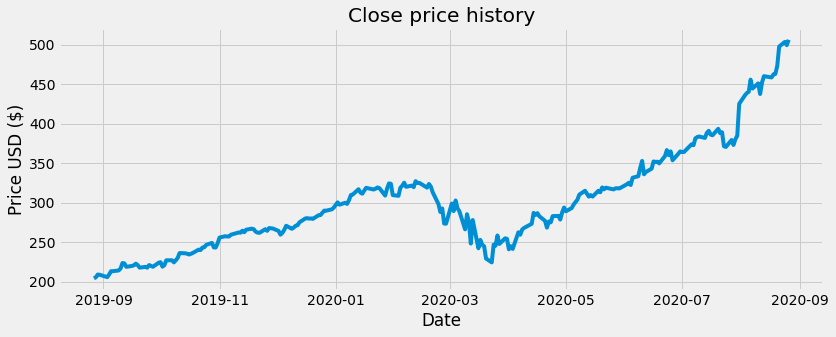

In [8]:
#Visually show the stock price 
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.title('Close price history')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [9]:
#Calculate the MACD and the single line indicators 

#Calculate the shortEMA 
shortEMA = df.Close.ewm(span=12, adjust=False).mean()

#Calculate the longEMA 
longEMA = df.Close.ewm(span=26, adjust=False).mean()

#Calculate the MACD 
MACD = shortEMA - longEMA 

#Calculate the Signal 
Signal = MACD.ewm(span=9, adjust=False).mean()


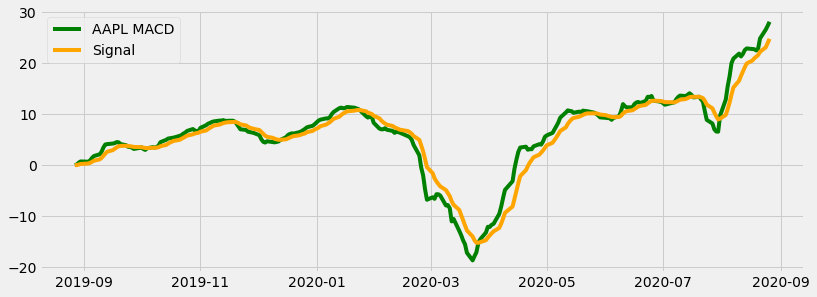

In [11]:
#Plot the chart 
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label = 'AAPL MACD', color = 'green', alpha=1) 
plt.plot(df.index, Signal, label = 'Signal', color = 'orange', alpha=1)
plt.legend(loc = 'upper left')
plt.show()

In [12]:
#Create the new columns for the data 
df['MACD'] = MACD 
df['Signal line'] = Signal

In [13]:
#Create a function to signal when to buy and sell an asset 
def buy_sell(signal): 
  Buy = []
  Sell = []
  flag = -1 

  for i in range(0, len(signal)): 
    if signal['MACD'][i] > signal['Signal line'][i]: 
      Sell.append(np.nan)
      if flag != 1: 
        Buy.append(signal['Close'][i])
        flag = 1
      else: 
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal line'][i]: 
      Buy.append(np.nan)
      if flag != 0: 
        Sell.append(signal['Close'][i])
        flag = 0
      else: 
        Sell.append(np.nan)
    else: 
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Buy, Sell)
  
      

In [14]:
#Create a buy and sell column 
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0] 
df['Sell_Signal_Price'] = a[1]

In [15]:
#Show the data 
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line,Buy_Signal_Price,Sell_Signal_Price
2019-08-27,2019-08-27,207.860001,208.550003,203.529999,204.160004,202.154251,25873300,0.000000,0.000000,NaN,NaN
2019-08-28,2019-08-28,204.100006,205.720001,203.320007,205.529999,203.510803,15938800,0.109287,0.021857,205.529999,NaN
2019-08-29,2019-08-29,208.500000,209.320007,206.660004,209.009995,206.956604,20990500,0.471272,0.111740,NaN,NaN
2019-08-30,2019-08-30,210.160004,210.449997,207.199997,208.740005,206.689255,21143400,0.727971,0.234987,NaN,NaN
2019-09-03,2019-09-03,206.429993,206.979996,204.220001,205.699997,203.679108,20023000,0.678284,0.323646,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-20,2020-08-20,463.000000,473.570007,462.929993,473.100006,473.100006,31726800,22.848761,21.570121,NaN,NaN
2020-08-21,2020-08-21,477.049988,499.470001,477.000000,497.480011,497.480011,84513700,24.823935,22.220884,NaN,NaN
2020-08-24,2020-08-24,514.789978,515.140015,495.750000,503.429993,503.429993,86484400,26.563184,23.089344,NaN,NaN
2020-08-25,2020-08-25,498.790009,500.720001,492.209991,499.299988,499.299988,52873900,27.293670,23.930209,NaN,NaN


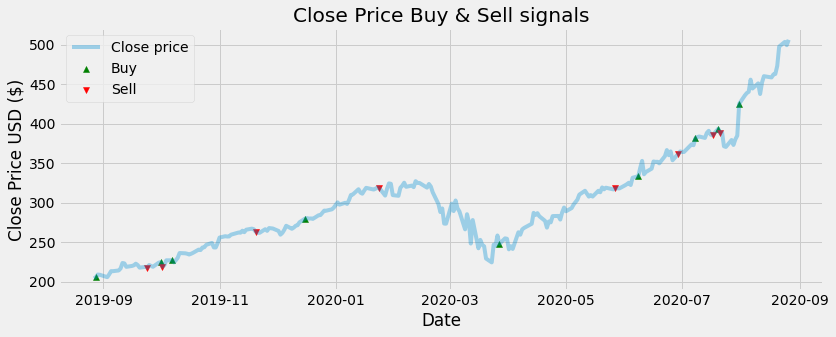

In [16]:
#Visually show the stock buy and sell signals 
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color = 'green', label='Buy', marker='^', alpha = 1)
plt.scatter(df.index, df['Sell_Signal_Price'], color = 'red', label='Sell', marker='v', alpha = 1)
plt.plot(df['Close'], label='Close price', alpha = 0.35) 
plt.title('Close Price Buy & Sell signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()
